In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("data.csv")

In [5]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


- Thinking of a problem that's interesting for you and finding a dataset for that
- Describing this problem and explaining how a model could be used
- Preparing the data and doing EDA, analyzing important features
- Training multiple models, tuning their performance and selecting the best model
- Exporting the notebook into a script
Putting your model into a web service and deploying it locally with docker
- Bonus points for deploying the service to the cloud

In [6]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
numerical = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
             'nr.employed']

In [9]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome']

In [10]:
# output: categorical
# categorical input ==> mutual information
# numerical input ==> spearman's

In [11]:
X = data.copy()
y = X.pop("y")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [12]:
cat_df = X[categorical]

In [13]:
# mutual inf
from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(cat_df, y)
print(mi_score)

[0.01093988 0.00166102 0.00199759 0.0055854  0.00453002 0.
 0.01454187 0.02754838 0.00035008 0.03171661]


In [14]:
# import the required functions and object.
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

select_k = 10
selection = SelectKBest(mutual_info_classif, k=select_k).fit(cat_df, y)
features = cat_df.columns[selection.get_support()]
print(features)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [15]:
mi_scores = pd.Series(mi_score, name="MI Scores", index=cat_df.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

poutcome       0.031717
month          0.027548
contact        0.014542
job            0.010940
default        0.005585
housing        0.004530
education      0.001998
marital        0.001661
day_of_week    0.000350
loan           0.000000
Name: MI Scores, dtype: float64

 High mutual information indicates a large reduction in uncertainty; low mutual information indicates a small reduction; and zero mutual information between two random variables means the variables are independent.

In [16]:
# sperman's

In [17]:
num_df = X[numerical]

In [18]:
def corrResult(min_corr, max_corr, data):
  for i in range(0, len(data.columns)):
    for j in range(0, len(data.columns)):
      if i != j:
       corr_1 = np.abs(data[data.columns[i]].corr(data[data.columns[j]] ,method = "spearman"))
       
       if corr_1 < min_corr:
          print(data.columns[i], " and ", data.columns[j], "There is no relation")
       elif corr_1 > max_corr:
          print(data.columns[i], " and ", data.columns[j]," There is a relation")

corrResult(min_corr = 0.3, max_corr = 0.75, data = num_df)

age  and  campaign There is no relation
age  and  pdays There is no relation
age  and  previous There is no relation
age  and  emp.var.rate There is no relation
age  and  cons.price.idx There is no relation
age  and  cons.conf.idx There is no relation
age  and  euribor3m There is no relation
age  and  nr.employed There is no relation
campaign  and  age There is no relation
campaign  and  pdays There is no relation
campaign  and  previous There is no relation
campaign  and  emp.var.rate There is no relation
campaign  and  cons.price.idx There is no relation
campaign  and  cons.conf.idx There is no relation
campaign  and  euribor3m There is no relation
campaign  and  nr.employed There is no relation
pdays  and  age There is no relation
pdays  and  campaign There is no relation
pdays  and  emp.var.rate There is no relation
pdays  and  cons.price.idx There is no relation
pdays  and  cons.conf.idx There is no relation
pdays  and  euribor3m There is no relation
pdays  and  nr.employed There 

In [19]:
#ANOVA
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

select_k = len(numerical)
selection = SelectKBest(f_classif, k=select_k).fit(num_df, y)
features = num_df.columns[selection.get_support()]
print(features)

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [20]:
score = f_classif(num_df, y)
print(score)

(array([  38.09465929,  182.15667288, 4861.17327205, 2304.25708794,
       4023.82992549,  778.58979485,  124.40997473, 4309.47904811,
       5926.61060111]), array([6.80213642e-010, 2.00777999e-041, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 9.31892280e-170, 7.53666501e-029, 0.00000000e+000,
       0.00000000e+000]))


In [21]:
scores = pd.Series(score[0], name="anova Scores", index=num_df.columns)
scores = scores.sort_values(ascending=False)
scores
# score[0] ==> f values
# score[1] ==> p values

nr.employed       5926.610601
pdays             4861.173272
euribor3m         4309.479048
emp.var.rate      4023.829925
previous          2304.257088
cons.price.idx     778.589795
campaign           182.156673
cons.conf.idx      124.409975
age                 38.094659
Name: anova Scores, dtype: float64

 - The F-value in an ANOVA is calculated as: variation between sample means / variation within the samples.
 - The higher the F-value in an ANOVA, the higher the variation between sample means relative to the variation within the samples.
 - The higher the F-value, the lower the corresponding p-value.

In [22]:
new_data = data[['poutcome', 'month', 'contact', 'job', 'nr.employed', 'pdays', 'euribor3m',
             'emp.var.rate', 'previous', 'y']]

In [23]:
new_data.y = (new_data.y == 'yes').astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [24]:
len(new_data)

41188

In [25]:
from sklearn.model_selection import  train_test_split 
df_full_train, df_test = train_test_split(new_data, test_size = 0.2, random_state=1)
len(df_full_train),len(df_test)

(32950, 8238)

In [26]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.20, random_state=1)
len(df_train),len(df_val)

(26360, 6590)

In [27]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [28]:
del df_train['y']
del df_val['y']
del df_test['y']

In [29]:
df_full_train = df_full_train.reset_index(drop = True)
df_full_train.isnull().sum()

poutcome        0
month           0
contact         0
job             0
nr.employed     0
pdays           0
euribor3m       0
emp.var.rate    0
previous        0
y               0
dtype: int64

In [30]:
from sklearn.feature_extraction import DictVectorizer
train_dicts = df_train.to_dict(orient='records')
dict_vec = DictVectorizer(sparse = False)
X_train = dict_vec.fit_transform(train_dicts)

In [31]:
from sklearn.feature_extraction import DictVectorizer
val_dicts = df_val.to_dict(orient='records')
#dict_vec = DictVectorizer(sparse = False)
X_val = dict_vec.transform(val_dicts)

# DecisionTreeClassifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
scores = []

for depth in [4,5,6, 7, 10, 15, 20]:
  for sample_num in [1,2,5,10,15,20,100,200,500]:
    d_tree = DecisionTreeClassifier(max_depth = depth, min_samples_leaf= sample_num)
    d_tree.fit(X_train, y_train)

    y_pred = d_tree.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((depth, sample_num, auc))
    #print('(%4s, %3d) ==> %.3f' % (depth, sample_num, auc))

In [33]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.746415
1,4,2,0.746415
2,4,5,0.747851
3,4,10,0.747836
4,4,15,0.747491


In [34]:
df_scores.sort_values(by='auc', ascending = False).head()

,max_depth,min_samples_leaf,auc
42,10,100,0.797444
34,7,200,0.795585
41,10,20,0.794729
51,15,100,0.793480
33,7,100,0.793321


In [35]:
df_scores_pivot = df_scores.pivot(index = 'min_samples_leaf', columns = ['max_depth'], values = ['auc'])
df_scores_pivot.round(3)

auc                                          
max_depth            4      5      6      7      10     15     20
min_samples_leaf                                                 
1                 0.746  0.768  0.778  0.773  0.748  0.707  0.672
2                 0.746  0.768  0.778  0.773  0.751  0.715  0.702
5                 0.748  0.769  0.781  0.778  0.773  0.767  0.760
10                0.748  0.769  0.784  0.784  0.780  0.786  0.781
15                0.747  0.769  0.784  0.784  0.784  0.792  0.788
20                0.747  0.769  0.784  0.791  0.795  0.791  0.789
100               0.754  0.768  0.776  0.793  0.797  0.793  0.793
200               0.785  0.782  0.793  0.796  0.792  0.792  0.792
500               0.784  0.782  0.788  0.788  0.788  0.788  0.788

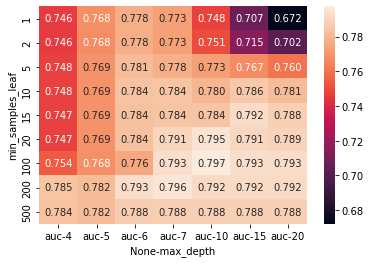

In [36]:
import seaborn as sns
sns.heatmap(df_scores_pivot, annot = True, fmt = '.3f')

In [37]:
last_tree = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 100)
last_tree.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100)

In [38]:
max_depth=10


# RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rand_for = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rand_for.fit(X_train, y_train)

        y_pred = rand_for.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [40]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

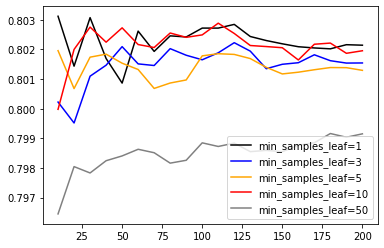

In [41]:
import matplotlib.pyplot as plt
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [42]:
min_samples_leaf = 10

In [43]:
last_forest = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
last_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=200,
                       random_state=1)

# Gradient Boosting and XGBoost

In [44]:
!pip install xgboost
import xgboost as xgb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
features = dict_vec.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names = features)
dval = xgb.DMatrix(X_val, label = y_val, feature_names = features)

In [46]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [47]:
%%capture output
xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric':'auc',
    'nthread': 8,

    'seed':1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round = 200, verbose_eval = 5, evals=watchlist)

In [48]:
s = output.stdout
print(s)

[0]	train-auc:0.790992	val-auc:0.784056
[5]	train-auc:0.800886	val-auc:0.799407
[10]	train-auc:0.807993	val-auc:0.803745
[15]	train-auc:0.813654	val-auc:0.804314
[20]	train-auc:0.816741	val-auc:0.80614
[25]	train-auc:0.820368	val-auc:0.805143
[30]	train-auc:0.822633	val-auc:0.804987
[35]	train-auc:0.824644	val-auc:0.804383
[40]	train-auc:0.82603	val-auc:0.802647
[45]	train-auc:0.826809	val-auc:0.801186
[50]	train-auc:0.827878	val-auc:0.800939
[55]	train-auc:0.828217	val-auc:0.801606
[60]	train-auc:0.828786	val-auc:0.801963
[65]	train-auc:0.828937	val-auc:0.802046
[70]	train-auc:0.829091	val-auc:0.802259
[75]	train-auc:0.829355	val-auc:0.801812
[80]	train-auc:0.829404	val-auc:0.801904
[85]	train-auc:0.829618	val-auc:0.801931
[90]	train-auc:0.82985	val-auc:0.801901
[95]	train-auc:0.830269	val-auc:0.80204
[100]	train-auc:0.830615	val-auc:0.802107
[105]	train-auc:0.830862	val-auc:0.801932
[110]	train-auc:0.830913	val-auc:0.802052
[115]	train-auc:0.831042	val-auc:0.801913
[120]	train-auc:0.

In [49]:
def parse_xgb_output(output):
  results = []

  for line in output.stdout.strip().split('\n'):
    it_line, train_line, val_line = line.split('\t')

    it = int(it_line.strip('[]'))
    train = float(train_line.split(':')[1])
    val = float(val_line.split(':')[1])

    results.append((it,train,val))

  columns = ['num_iter', 'train_auc', 'val_auc']
  df_results = pd.DataFrame(results, columns = columns)
  return df_results

In [50]:
df_score = parse_xgb_output(output)

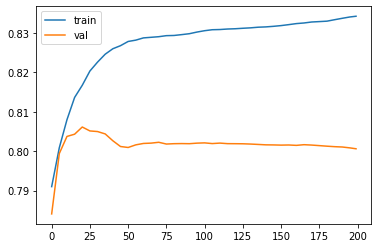

In [51]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

# Selecting the final model

In [52]:
from sklearn.feature_extraction import DictVectorizer
val_dicts = df_test.to_dict(orient='records')
#dict_vec = DictVectorizer(sparse = False)
X_test = dict_vec.transform(val_dicts)

In [53]:
# decision tree
y_pred = last_tree.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.7973548464491363

In [54]:
# random forest
y_pred = last_forest.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.8108959128236349

In [55]:
full_train = xgb.DMatrix(X_train, label=y_train,
                    feature_names = dict_vec.get_feature_names_out())

test = xgb.DMatrix(X_test, feature_names = dict_vec.get_feature_names_out())

In [56]:
#XGB


xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, full_train, num_boost_round=75)

In [57]:
y_pred = model.predict(test)

In [58]:
roc_auc_score(y_test, y_pred)

0.8091902358799664